In [ ]:

import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Machine Learning Project/WineQT.csv')
df.describe()
df


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


Data summary:   

*   1443 rows.
*   13 coulumns: all numeric value
    1 column for id, 1 for overall Quality, 11 for amount of ingredients input



#Data profiling

In [ ]:
#null count : no column contains null value
df.isnull().sum()


,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
#duplicate count : no duplicate data
df.duplicated().sum()

np.int64(0)

#Univariate analysis

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


**Histplot**

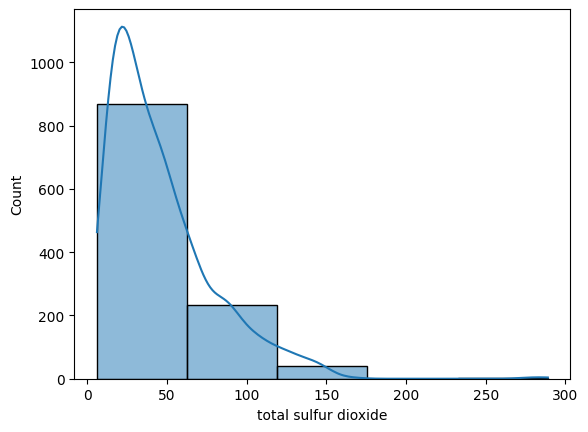

In [ ]:
# df.histplot(figsize=(12,10))

sns.histplot(data=df, x='total sulfur dioxide', bins=5, kde=True)
plt.show()

#OUTLIERS

<Axes: >

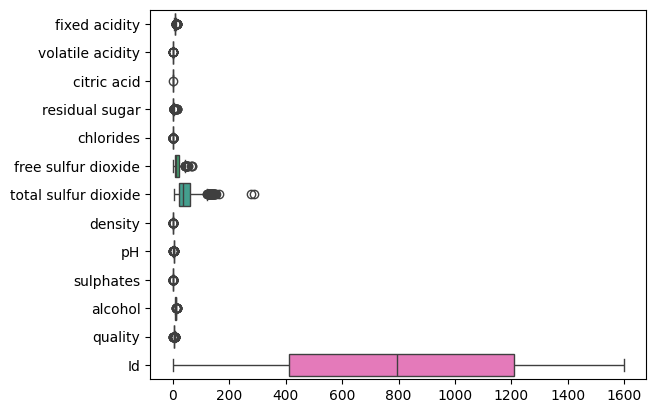

In [ ]:
#using boxplot to find outliers. Free Sulfur dioxide and total sulfur dioxide have outliers need to be handled.
sns.boxplot(data=df, orient="h")

**Outliers individual**

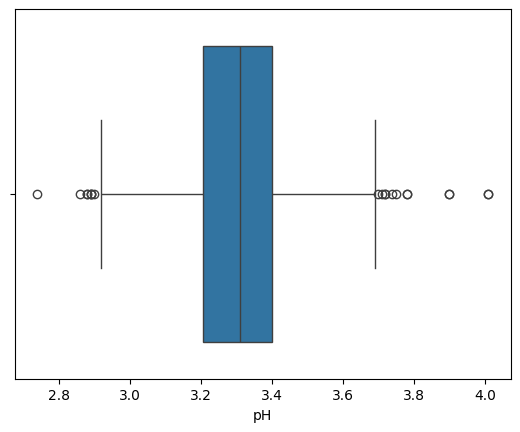

In [ ]:
sns.boxplot(x=df['pH'])
plt.show()

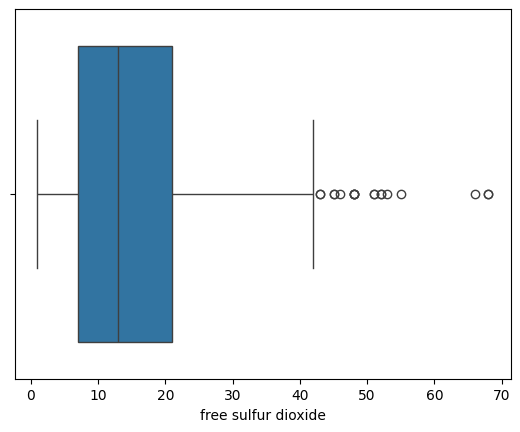

In [ ]:
sns.boxplot(x=df['free sulfur dioxide'])
plt.show()

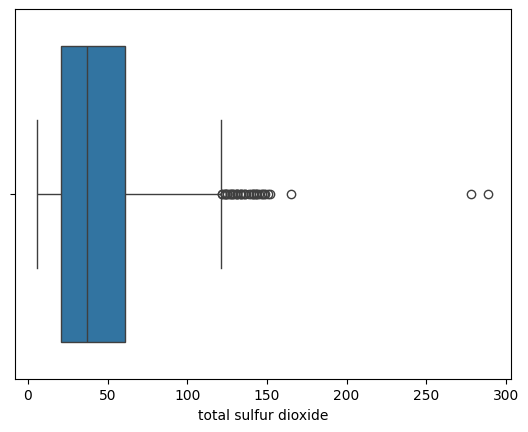

In [ ]:
sns.boxplot(x=df['total sulfur dioxide'])
plt.show()

In [ ]:
df_copy=df.copy() #copied to conduct multipier
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [ ]:
#drop Id column which is not a necessary column
df_copy.drop('Id', axis=1, inplace=True)

<Axes: >

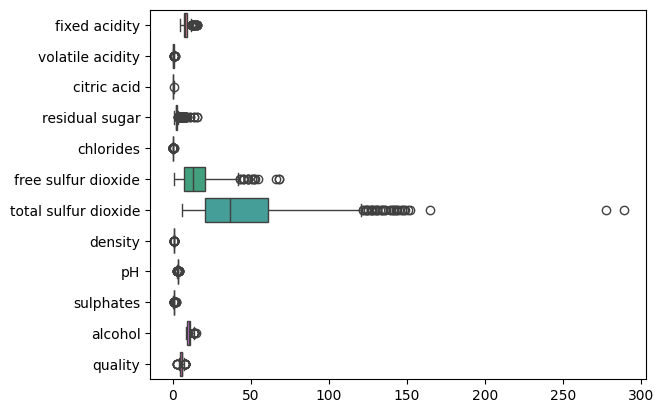

In [ ]:
sns.boxplot(data=df_copy, orient="h")

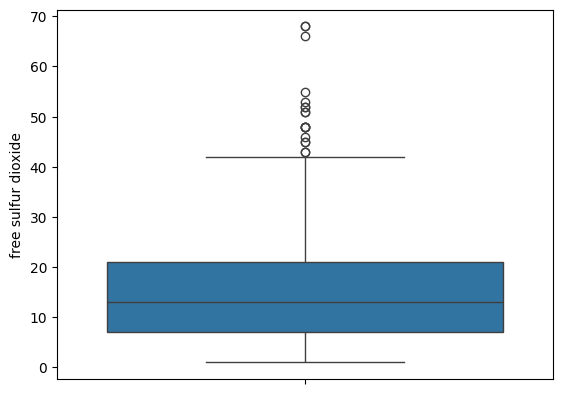

In [ ]:
#using IQR method to handle outliers  #IQR= Inter Quartile Range
q1 = df_copy['free sulfur dioxide'].quantile(0.25)
q3 = df_copy['free sulfur dioxide'].quantile(0.75)
iqr = q3 - q1
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr
df_fil= (df_copy['free sulfur dioxide'] > lower_limit) & (df_copy['free sulfur dioxide'] < upper_limit)

#plt.title("Boxplot of free sulfur dioxide with less outliers")
sns.boxplot(y=df_copy['free sulfur dioxide'])
plt.show()

#Bivariate Analysis

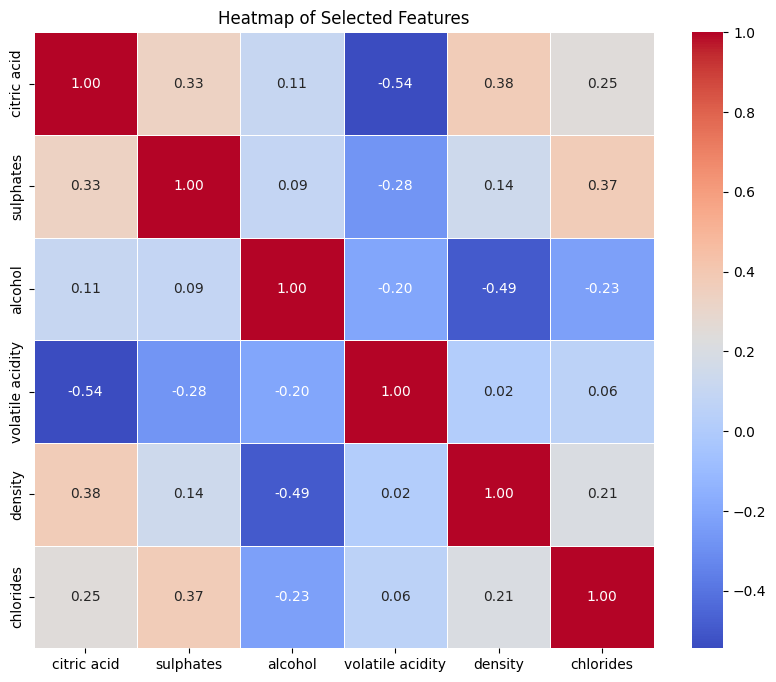

In [ ]:
#Heatmap
#sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
selected_cols = ['citric acid', 'sulphates', 'alcohol', 'volatile acidity', 'density', 'chlorides']
corr_matrix = df[selected_cols].corr()

#plot now
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Selected Features")
plt.show()


#**Supervised Machine Learning**
#Linear Regression

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score #variance
from sklearn.model_selection import train_test_split #random split

#Defining Variables

In [ ]:
# Independent variables (features)
X = df_copy.drop(columns=['quality'])

# Target variable
y = df_copy['quality']

#Train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("train set size:",len(X_train))
print("test set size:",len(X_test))

train set size: 914
test set size: 229


#Applying Linear Regression

In [ ]:
base_model = LinearRegression()
base_model.fit(X_train, y_train)

LinearRegression()

#Model Evaluation

In [ ]:
y_pred = base_model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 0.38
Mean Absolute Error: 0.48
R² Score: 0.32


#Saving .pkl for deploying to streamlit

In [ ]:
import pickle


In [ ]:
# # Define the filename
filename = 'base_model.pkl'
# Save the model
with open(filename, 'wb') as file:
    pickle.dump(base_model, file)